In [1]:
# packages

import numpy as np
import cobra
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite, Model

In [2]:
# model input

model = read_sbml_model("iJN678mva.xml")
model

Name,iJN678
Memory address,0x01b4b7e74250
Number of metabolites,800
Number of reactions,881
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_SynHetero - 1.0*BIOMASS_Ec_SynHetero_reverse_5d8af
Compartments,"cytosol, periplasm, thylakoid, extracellular space"


In [3]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction BIOMASS_Ec_SynHetero at 0x1b4c450ceb0>: 1.0}

In [6]:
# change the objective

model.objective = "EX_sql_e"
model.reactions.get_by_id("EX_sql_e").upper_bound = 1000.
linear_reaction_coefficients(model)

ValueError: invalid objective

In [ ]:
model.optimize().objective_value

In [ ]:
model.metabolites.sql_c.summary()

In [7]:
# LOOPLESS FBA

from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba

nominal = model.optimize()
loopless = loopless_solution(model)

<AxesSubplot:xlabel='loopless', ylabel='nominal'>

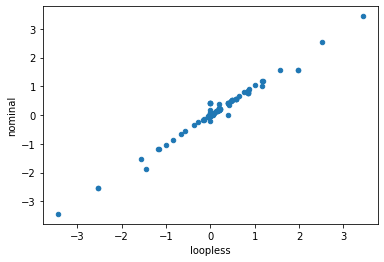

In [8]:
import pandas

df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))

df.plot.scatter(x='loopless', y='nominal')

In [9]:
solution = pfba(model)
solution

,fluxes,reduced_costs
EX_ac_e,0.000000,90.0
34DHOXPEGOX,0.000000,-2.0
EX_photon_e,0.000000,15.4
34HPPOR,0.000033,-2.0
EX_ca2_e,-0.000285,2.0
...,...,...
DM_frdp_c,0.000000,1755.2
R_MVA7,0.000000,-2.0
DM_psql_c,0.000000,1689.2
R_MVA8,0.000000,-2.0
